Task 1: Data Loading and Exploration 

In [11]:
import pandas as pd
df = pd.read_csv('house_price_data.csv')
df.isnull().sum()
df.describe()
df.shape


(8000, 25)

Task 2: Exploratory Data Analysis

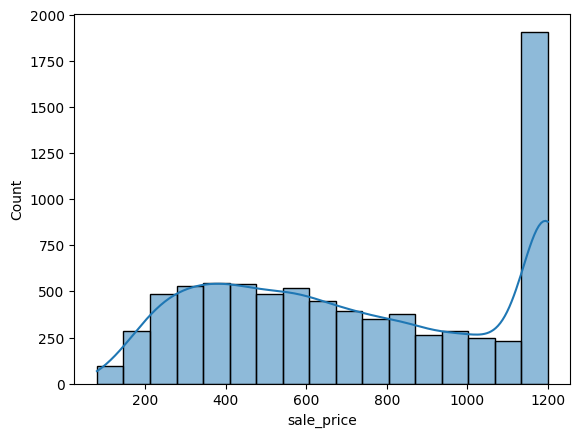

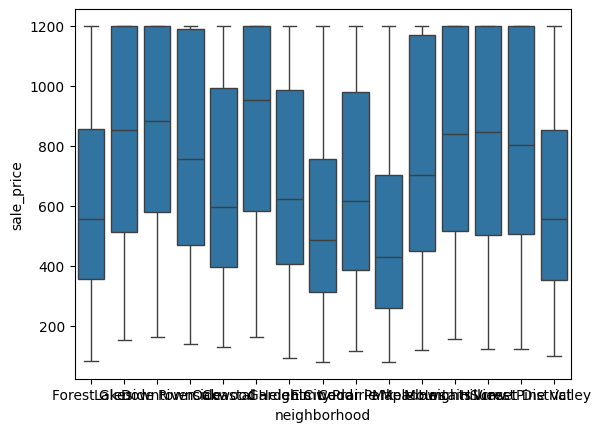

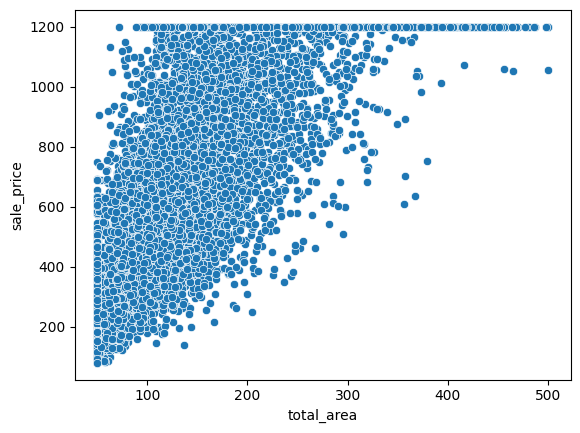

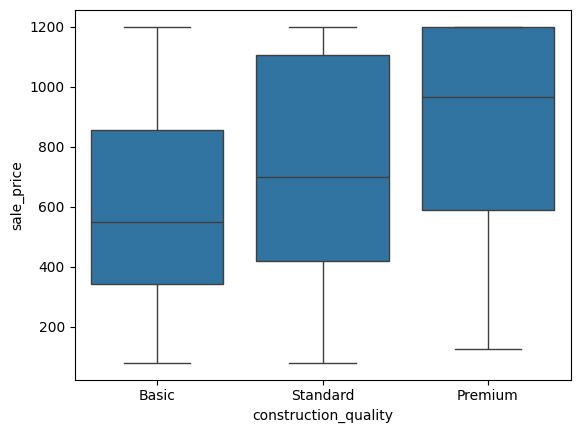

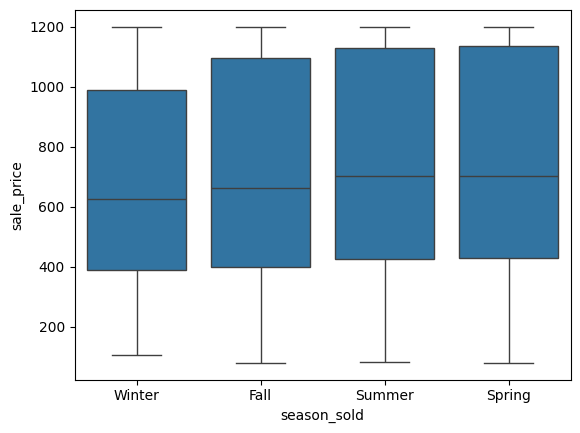

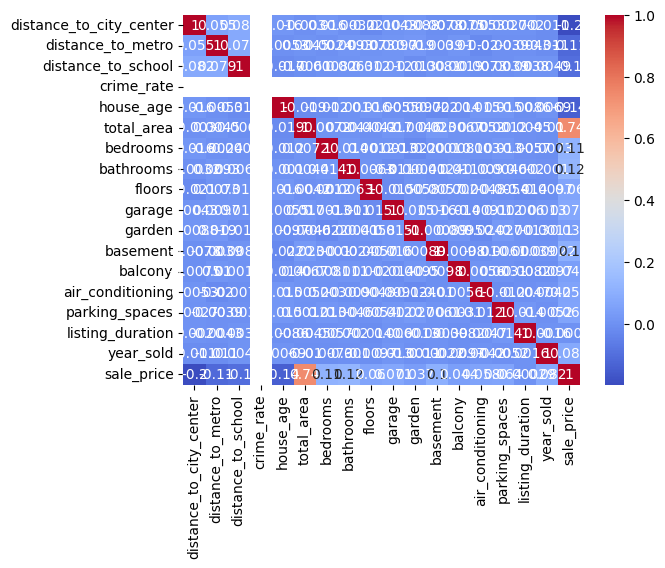

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['sale_price'], kde=True)
plt.show()
df['sale_price'].skew()
sns.boxplot(x='neighborhood', y='sale_price', data=df)
plt.show()
sns.scatterplot(x='total_area', y='sale_price', data=df)
plt.show()
sns.boxplot(x='construction_quality', y='sale_price', data=df)
plt.show()
sns.boxplot(x='season_sold', y='sale_price', data=df)
plt.show()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


Task 3: Feature Engineering and Preprocessing

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

y = df['sale_price']
X = df.drop('sale_price', axis=1)

for c in X.columns:
    if pd.api.types.is_interval_dtype(X[c]):
        X[c] = X[c].astype(str)
    if X[c].dtype == 'object':
        X[c] = LabelEncoder().fit_transform(X[c])

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


C:\Users\Mohit\AppData\Local\Temp\ipykernel_25324\3337691882.py:8: DeprecationWarning: is_interval_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.IntervalDtype)` instead
  if pd.api.types.is_interval_dtype(X[c]):
C:\Users\Mohit\AppData\Local\Temp\ipykernel_25324\3337691882.py:8: DeprecationWarning: is_interval_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.IntervalDtype)` instead
  if pd.api.types.is_interval_dtype(X[c]):
C:\Users\Mohit\AppData\Local\Temp\ipykernel_25324\3337691882.py:8: DeprecationWarning: is_interval_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.IntervalDtype)` instead
  if pd.api.types.is_interval_dtype(X[c]):
C:\Users\Mohit\AppData\Local\Temp\ipykernel_25324\3337691882.py:8: DeprecationWarning: is_interval_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.IntervalDtype)` instead
  if pd.api.types.is_interval_d

((6400, 24), (1600, 24))

Task 4: Model Development

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Task 5: Model Evaluation

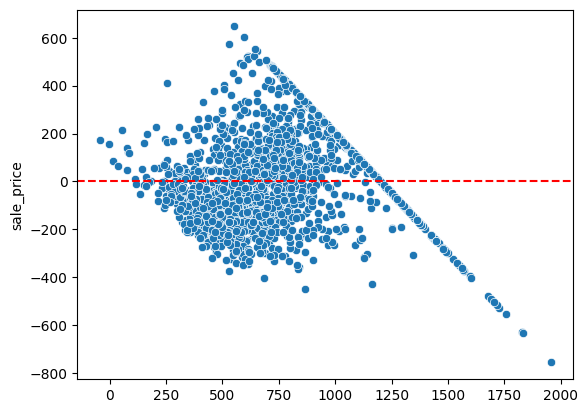

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
(mae, mse, rmse, r2)

residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
